# Theoretical Part 

## 1.a. What is the computational/time complexity of the basic perceptron algorithm.
=> Answer : TimeComplexity = O(n x m) (because there is a loop with m iterations nested in a loop with n iterations)
*n = the number of iterations of the first loop
m = the number of points*

## 1.b. What is the space complexity of the basic perceptron algorithm.
=> Answer : SpaceComplexity = O(m x d) (m the number of points and d is the dimension of each point) because the only variable that needs memory allocation is our weights.

# Used Packages

We used multiple external libraries to facilitate the calculations.

In [ ]:
!pip install matplotlib==3.4.3
!pip install numpy==1.19.5
!pip install -U scikit-learn

In [ ]:
import matplotlib
import pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Implementation

Constant values

In [ ]:
NB_POINTS = 250
input_size = 2
mu1 = np.array([-1,0])
mu2 = np.array([1,0])
NB_ITERATIONS = 100

Generating the dataset points using a normal distrubition

In [ ]:
def generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size):
  '''
  This function generates data samples according to the given instruction which 
  consisits of two halves of randomly genarated clusters having (mu1,mu2) and (sigma1,sigma2)
  as their mean and variance respectively.
  input_size: The dimension of the generated points.
  NB_POINTS: The total number of generated points.
  '''
  #First Half
  X1 = sigma1 * np.random.randn(NB_POINTS//2,input_size) + mu1
  Y1 = -1*np.ones(NB_POINTS//2, dtype=int)
  #Second Half
  X2 = sigma2 * np.random.randn(NB_POINTS//2,input_size) + mu2
  Y2 = np.ones(NB_POINTS//2, dtype=int)
  #Concatenation
  X =  np.concatenate((X1,X2))
  Y = np.concatenate((Y1,Y2))
  return X,Y

### Plotting the dataset

In [ ]:
#SHOWS THE CLUSTERS
def plot_dataset(input,target,title="Clusters",weights=[0,0,0],show_boundry=False):
  '''
  This function plots data samples with the option to draw the boundary according to
  the given weights vector.
  '''
  fig, ax = plt.subplots()
  scatter = plt.scatter(input[:,0], input[:,1],c=target,cmap="autumn")
  plt.title(title)
  legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Labels")
  ax.add_artist(legend1)
  plt.gca().set_ylim([-5, 5])
  """Plot a line from slope and intercept"""
  if show_boundry:
    axes = plt.gca()
    x_vals = np.array((-2.5,2.5))
    m = -weights[1]/weights[2]
    c = -weights[0]/weights[2]
    y_vals = m*x_vals + c
    plt.plot(x_vals, y_vals, '--')
  plt.show()

### Perceptron Implementation

In [ ]:
#Perceptron definition
def preceptron(X_train, y_train, NB_INPUT, NB_ITERATIONS):
  w = w_old = np.zeros((NB_INPUT+1,NB_ITERATIONS))
  t=0
  for t in range(1,NB_ITERATIONS):
    w_old =w[:,t-1]
    for xi, yi in zip(X_train, y_train):
      xi = np.insert(xi, 0, 1)
      if np.dot(w[:,t],np.transpose(xi))*yi <=0:
        w[:,t] = w[:,t] + np.dot(yi,xi)
    if np.array_equal(w[:,t], w_old):
      return w[:,t]
  return w[:,t]

## Experiment 1

In [ ]:
#Generating data for the first experiment
sigma1= sigma2= 0.25
X,Y = generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size)
print("X ",X.shape," , Y",Y.shape)
#SPLIT AND SHUFFLE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True)
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)

X  (250, 2)  , Y (250,)
X_train.shape (200, 2) y_train.shape (200,)


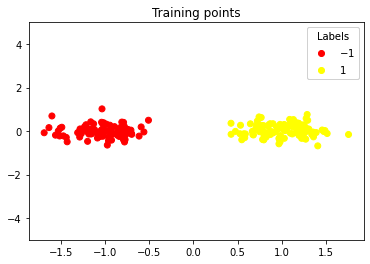

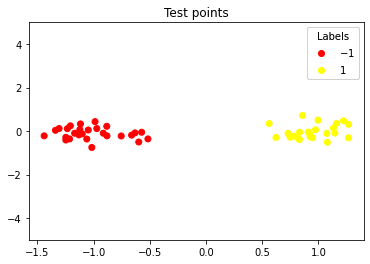

In [ ]:
#Plotting the training and test sets
plot_dataset(X_train,y_train,"Training points")
plot_dataset(X_test,y_test,"Test points")

In [ ]:
#Generating the weights
weights = preceptron(X_train, y_train, input_size, NB_ITERATIONS)
print("FINAL WEIGHTS : ",weights)

FINAL WEIGHTS :  [ 0.          1.58659095 -0.1685488 ]


### Question 1: Does the algorithm converges? Why?
=>Answer : Yes. Because the two classes are separable. In other words we can draw a line that perfectly seperates the two clusters of points. And this is the result of the distrubtion of points.
*Note: the classes corresponds to both the points with label 1 and -1 respectively.*


###Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?


=>Answer : No, the decision boundary is not unique, it dependents on the initialization of the weights.

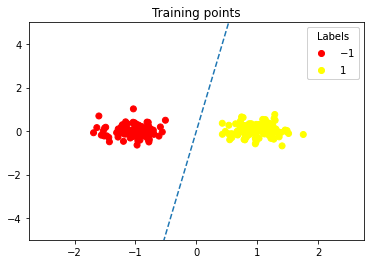

In [ ]:
plot_dataset(X_train,y_train,"Training points",weights=weights,show_boundry=True)

###Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.
=>Answer : the accuracy is 100%

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(X_test, y_test, w):
  s = 0
  for xi, yi in zip(X_test, y_test):
    xi = np.insert(xi, 0, 1)
    if np.dot(w,np.transpose(xi))*yi >0:
      s += 1
  return s / float(len(y_test))
print("Accuracy : ",accuracy_metric(X_test, y_test, weights) * 100.0 , '%')

Accuracy :  100.0 %


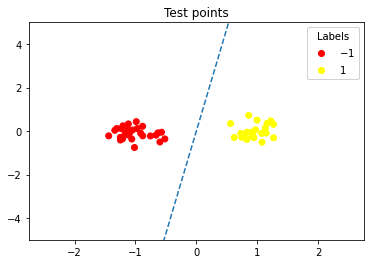

In [ ]:
plot_dataset(X_test,y_test,"Test points",weights=weights,show_boundry=True)

## Experiment 2


In [ ]:
sigma1= sigma2= 0.75
X, Y = generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size)
#SPLIT AND SHUFFLE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True)
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)

X_train.shape (200, 2) y_train.shape (200,)


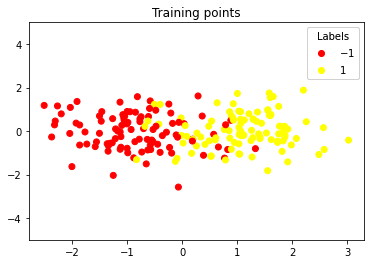

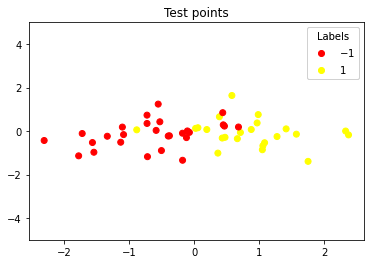

In [ ]:
#Plotting the training and test sets
plot_dataset(X_train,y_train,"Training points")
plot_dataset(X_test,y_test,"Test points")

In [ ]:
#Generating the weights
weights = preceptron(X_train, y_train, 2, NB_ITERATIONS)
print(weights)

[-1.          3.87005802  1.57267313]


### Question 1: Does the algorithm converges? Why?
=>Answer : No. Because the two classes are not separable due to the high variance of their distrubtion.


###Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?


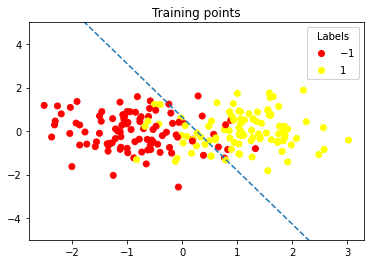

In [ ]:
plot_dataset(X_train,y_train,"Training points",weights=weights,show_boundry=True)

=>Answer : No, the decision boundary is not unique. No, changing the initialisation changes the result of the algorithm because it does not converge.

###Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.


In [ ]:
print("Accuracy : ",accuracy_metric(X_test, y_test, weights) * 100, '%')

Accuracy :  82.0 %


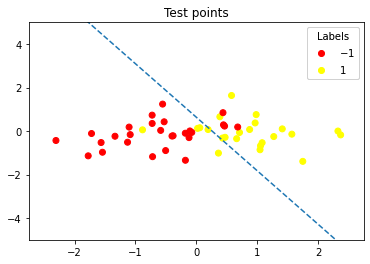

In [ ]:
plot_dataset(X_test,y_test,"Test points",weights=weights,show_boundry=True)

On the previous experiences :                                                   
The more the variance increases the more the error. As a result, the probability to have outliers increases. 

## Experiment 3

In [ ]:
#We used this function instead of (1 - accuracy) for better error values
def calculate_error(X_test, y_test,weights):
  e=0
  for xi, yi in zip(X_test, y_test):
    xi = np.insert(xi, 0, 1)
    if np.dot(weights,np.transpose(xi))*yi <=0:
      e+=1
  return e /float(len(y_test))

sigma = 0.01 : error =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sigma = 0.1 : error =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sigma = 0.5 : error =  [0.12, 0.04, 0.02, 0.02, 0.02, 0.02, 0.06, 0.04, 0.06, 0.04, 0.08, 0.06, 0.08, 0.02, 0.02, 0.04, 0.02, 0.02, 0.02, 0.06, 0.04, 0.1, 0.04, 0.02, 0.0, 0.0, 0.1, 0.0, 0.02, 0.0]
sigma = 0.7 : error =  [0.1, 0.2, 0.18, 0.02, 0.1, 0.2, 0.12, 0.12, 0.1, 0.1, 0.08, 0.08, 0.14, 0.0, 0.08, 0.1, 0.06, 0.2, 0.06, 0.18, 0.14, 0.16, 0.1, 0.3, 0.04, 0.1, 0.12, 0.12, 0.04, 0.18]
Vars :  [0.0, 0.0, 0.0009728888888888888, 0.0038862222222222215] 
Means :  [0.0, 0.0, 0.03933333333333334, 0.11733333333333335]


Text(0.5, 1.0, 'ERRORS')

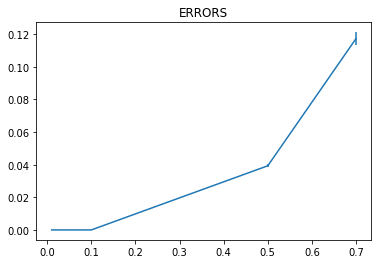

In [ ]:
'''
Computing the mean and the variance of the stored errors
for different values of the variance
'''
sigmas = [0.01, 0.1, 0.5, 0.7]
NB_ITERATIONS = 30
vars=[]
means=[]
error=[]
for i in range(len(sigmas)):
  e=[]
  for j in range(NB_ITERATIONS):
    X,Y = generate_data(mu1,mu2,sigmas[i],sigmas[i],NB_POINTS,input_size)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=7,shuffle=True)
    weights = preceptron(X_train, y_train, input_size, NB_ITERATIONS)
    e.append(calculate_error(X_test, y_test,weights))
  print("sigma = {} : error = ".format(sigmas[i]),e)
  error.append(e)
  vars.append(np.var(error[i]))
  means.append(np.mean(error[i]))
print("Vars : ",vars,"\nMeans : ",means)
plt.figure()
plt.errorbar(sigmas,means,yerr=vars)
plt.title("ERRORS")

###Comment the result.
We notice that by increasing the value of sigma1 and sigma2 the error becomes bigger so the curve which represents the variation of sigma according to the average of the error is increasing.
Also The value of the variance of the error increases by increasing sigma.